<h1> Análise exploratória sobre reviews </h1>

Importando bibliotecas

In [21]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import Image


<h2> Importando os dados e tratando para a análise </h2>

In [22]:
# Importando o dataset tratado

df = pd.read_parquet(r'dados_transformados\dados_transformados.parquet')

In [23]:
# Removendo os order_id repetidos

df = df.drop_duplicates(subset=['order_id', 'order_status'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   customer_id                    99441 non-null  object 
 2   order_status                   99441 non-null  object 
 3   order_purchase_timestamp       99441 non-null  object 
 4   order_approved_at              99281 non-null  object 
 5   order_delivered_carrier_date   97658 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  99441 non-null  object 
 8   order_item_id                  98666 non-null  float64
 9   product_id                     98666 non-null  object 
 10  seller_id                      98666 non-null  object 
 11  shipping_limit_date            98666 non-null  object 
 12  price                          98666 non-null

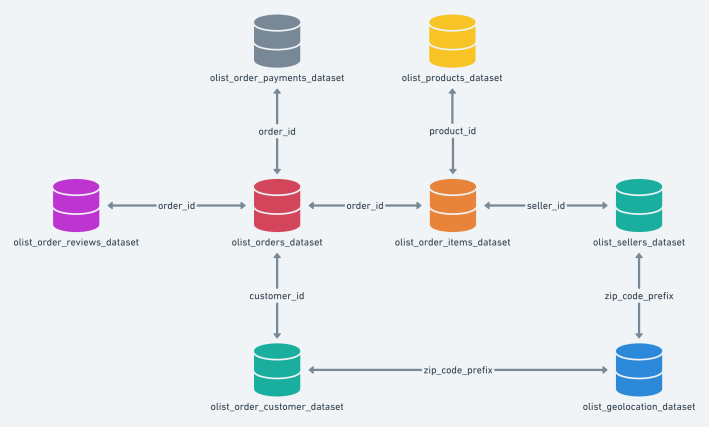

In [27]:
Image(filename ="PNG/relacaobd.png")

<h2> Verificando o comportamento padrão dos reviews (de 1 a 5) </h2>

In [16]:
# Criando a porcentagem de reviews por cada nota
r5 = len(df[df['review_score'] == 5]) * 100 / len(df)
r4 = len(df[df['review_score'] == 4]) * 100 / len(df)
r3 = len(df[df['review_score'] == 3]) * 100 / len(df)
r2 = len(df[df['review_score'] == 2]) * 100 / len(df)
r1 = len(df[df['review_score'] == 1]) * 100 / len(df)

# Média geral dos reviews
media_geral = df['review_score'].mean()

# Mostrando na tela os resultados de maneira arrendodada
print(len(df), 'Reviews no total')
print(f'nota 5: {r5:.1f}%')
print(f'nota 4: {r4:.1f}%')
print(f'nota 3: {r3:.1f}%')
print(f'nota 2: {r2:.1f}%')
print(f'nota 1: {r1:.1f}%')
print(f'média geral: {media_geral:.1f}')

99441 Reviews no total
nota 5: 57.3%
nota 4: 19.2%
nota 3: 8.2%
nota 2: 3.2%
nota 1: 11.4%
média geral: 4.1


Criando paleta de cores que atenda pessoas daltônicas

In [17]:
sns.set()

# Definindo cores
COLOR_r5 = '#DD7A30'
COLOR_r4 = '#891E5A'
COLOR_r3 = '#3C62CE'
COLOR_r2 = '#4FAB4E'
COLOR_r1 = '#4F47B2'
REVIEWS_PALETTE = sns.color_palette((COLOR_r1, COLOR_r2, COLOR_r3, COLOR_r4, COLOR_r5))

# Fundo claro para facilitar a visualização
sns.set_style('darkgrid', {'axes.facecolor': '#eeeeee'})

# Tamanho padrão
resize_plot = lambda: plt.gcf().set_size_inches(12, 5)

<h2> Resultado visual da distribuição de reviews </h2>

<b>Insights:</b>
1. Notas 1 aparecem mais que notas 2 e 3 somadas
2. A maior parte de reviews é de nota 5

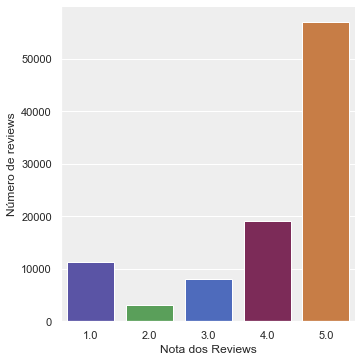

In [18]:
 sns.catplot(
    x='review_score', 
    kind='count', 
    data=df, 
    palette=REVIEWS_PALETTE
).set(
    xlabel='Nota dos Reviews', 
    ylabel='Número de reviews',
)

<h2> Verificando o comportamento padrão dos reviews (de 1 a 5) por categoria de produtos </h2>

<h3> Distribuição de notas por categoria de produto </h3>

- É possível notar que móveis de escritório apresentam mais notas negativas do que a média geral e merece uma análise mais aprofundada

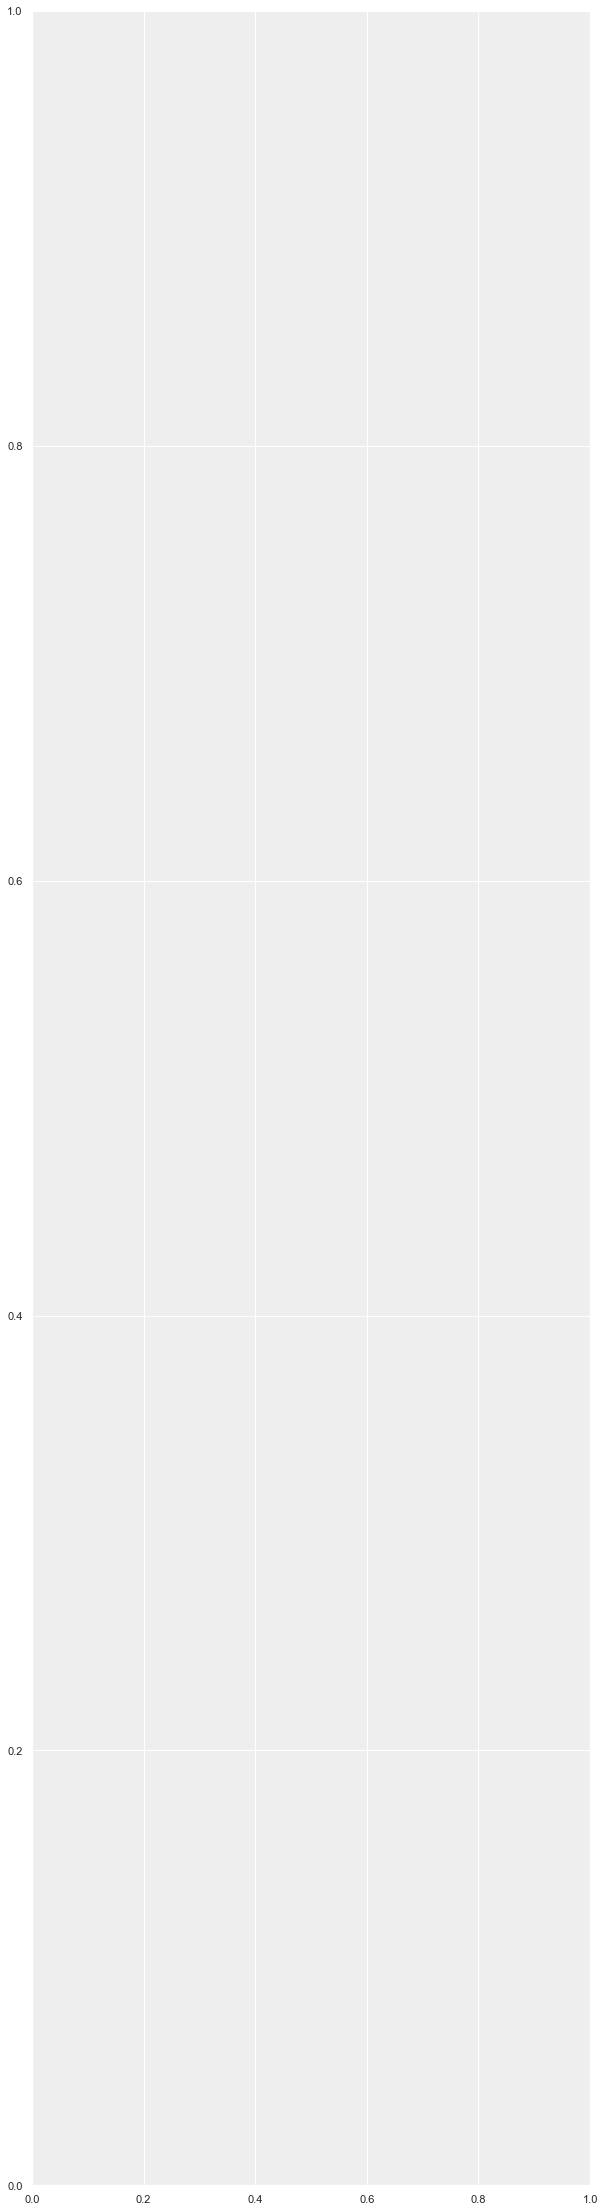

In [80]:
f, ax = plt.subplots(figsize=(10,40))



![tittle](PNG\Capturar.PNG)

<h2> Análise mais aprofundada da categoria que chamou atenção: móveis de escritório </h2>

In [81]:
# Filtrando os dados por m[oveis de escritório
df_moveis = df['product_category_name']=='moveis_escritorio'

In [82]:
df_moveis = df[df_moveis]

In [83]:
# Criando a porcentagem de reviews por cada nota
r5 = len(df_moveis[df_moveis['review_score'] == 5]) * 100 / len(df_moveis)
r4 = len(df_moveis[df_moveis['review_score'] == 4]) * 100 / len(df_moveis)
r3 = len(df_moveis[df_moveis['review_score'] == 3]) * 100 / len(df_moveis)
r2 = len(df_moveis[df_moveis['review_score'] == 2]) * 100 / len(df_moveis)
r1 = len(df_moveis[df_moveis['review_score'] == 1]) * 100 / len(df_moveis)

# Média geral dos reviews
media_moveis_escritorio = df_moveis['review_score'].mean()

# Mostrando na tela os resultados de maneira arrendodada
print(len(df_moveis), 'Reviews no total')
print(f'nota 5: {r5:.1f}%')
print(f'nota 4: {r4:.1f}%')
print(f'nota 3: {r3:.1f}%')
print(f'nota 2: {r2:.1f}%')
print(f'nota 1: {r1:.1f}%')
print(f'média geral: {media_moveis_escritorio:.1f}')

1265 Reviews no total
nota 5: 39.4%
nota 4: 23.2%
nota 3: 14.2%
nota 2: 4.7%
nota 1: 17.7%
média geral: 3.6


<h1> Diferenças do geral em números </h1>

- A porcentagem de notas 1  são de 17,7%, valor maior que a média geral de 11,4%
- A porcentagem de notas 5  são de 39,4%, valor menor que a média geral de 57,3% (quase 20% abaixo da média)
- A média geral caiu 0.5 nesse recorte

In [84]:
# Criando filtro para contar quanto cada estado vendeu de móveis de escritório
saida_UF_movel = df_moveis.groupby(['seller_state']).count()


In [85]:
# Criando o dataframe na mão pois deu erro de index
UF_moveis = pd.DataFrame({'UF': ['MG', 'PR', 'RJ', 'RS', 'SC', 'SP'],
                   'moveis_vendidos': [6, 28, 13, 1, 8, 1209]})

In [86]:
# Expondo o os móveis vendidos por UF
UF_moveis

,UF,moveis_vendidos
0,MG,6
1,PR,28
2,RJ,13
3,RS,1
4,SC,8
5,SP,1209


Como é possível perceber, a maior parte dos móveis de escritório partem de SP

A participação de cada estado nas vendas é de:
- MG: 0,5%
- PR: 2,2%
- RJ: 1,0%
- RS: 0,08%
- SC: 0,6%
- SP: 95,6%

Além disso, existem 585 comentários para o setor de móveis de escritório, sendo 575 no estado de São Paulo. Diante disso a análise da saída do produto se concentrará em SP por ser representativa

In [87]:
# Selecionando do dado geral apenas movéis de escritório que saíram de SP
selecao_venda_sp = (df['seller_state']=='SP')& (df['product_category_name']=='moveis_escritorio')

In [88]:
df_venda_sp = df[selecao_venda_sp]
df_venda_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209 entries, 11 to 119083
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       1209 non-null   object 
 1   customer_id                    1209 non-null   object 
 2   order_status                   1209 non-null   object 
 3   order_purchase_timestamp       1209 non-null   object 
 4   order_approved_at              1209 non-null   object 
 5   order_delivered_carrier_date   1204 non-null   object 
 6   order_delivered_customer_date  1194 non-null   object 
 7   order_estimated_delivery_date  1209 non-null   object 
 8   order_item_id                  1209 non-null   float64
 9   product_id                     1209 non-null   object 
 10  seller_id                      1209 non-null   object 
 11  shipping_limit_date            1209 non-null   object 
 12  price                          1209 non-null 

In [89]:
# Fazendo contagem de vendas por cidade de SP
cidades_venda = df_venda_sp.groupby(['seller_city']).count()
cidades_venda.head(20)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
seller_city,,,,,,,,,,,,,,,,,,,,,
araraquara,3,3,3,3,3,3,3,3,3,3,...,3,3,0,2,3,3,3,3,3,3
bady bassitt,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
guarulhos,11,11,11,11,11,10,10,11,11,11,...,11,11,6,8,11,11,11,11,11,11
itaquaquecetuba,1002,1002,1002,1002,1002,999,991,1002,1002,1002,...,995,995,102,496,995,995,1002,1002,1002,1002
lencois paulista,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mogi guacu,121,121,121,121,121,121,120,121,121,121,...,119,119,21,51,119,119,121,121,121,121
osasco,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
pinhais,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
portoferreira,1,1,1,1,1,0,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1


Como é possível perceber, a maior parte dos móveis de escritório partem de Itaquequecetuba e Mogi Guaçu:

A partipação de cada cidade nas vendas de móveis de escritório em SP é de:

- araraquara: 0.2%
- bady bassitt: 0.1%
- guarulhos: 0.9%
- itaquaquecetuba: 82.9%
- lencois paulista: 0.1%
- mogi guacu: 10.0%
- osasco: 0.2%
- pinhais: 0.1%
- portoferreira: 0.1%
- s jose do rio preto: 0.4%
- salto: 1.4%
- santo andre: 0.6%
- sao bernardo do campo: 2.2%
- sao paulo: 0.9%

Distribuição das notas por cidade de SP:

<img src="PNG\cidades_review_score3.PNG">

Analisando essas informações graficamente é possível notar que a cidade que há uma cidade específica que puxa a média de vendas de móveis para baixo

<img src="PNG\cidades_review_score_graf.PNG">

Distribuição dos zipcode_prefix na cidade de Itaquaquetecetuba:

<img src="PNG\zip_code_prefix.png">